In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#path creation
path=r"C:\Users\galia\OneDrive\Escritorio\DA course\6.1\Data"

In [4]:
#Import data base
df_boats=pd.read_csv(os.path.join(path,"df_boats_c.csv"))

In [5]:
df_boats.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany
4,6,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland


###### Pick out variables from your data set suitable for your exploratory visual analysis. I will remove currency and value because we have the price in eur.

In [6]:
df_boats.dtypes

Unnamed: 0             int64
boat_type             object
manufacturer          object
type                  object
year_built             int64
length               float64
width                float64
material              object
views_last_7_days      int64
currency              object
value                  int64
value_in_eur         float64
country               object
dtype: object

In [7]:
# Create a subset excluding the variables not needed 
subs = df_boats[["year_built","length", "width","views_last_7_days","value_in_eur"]]

In [8]:
subs.corr()

,year_built,length,width,views_last_7_days,value_in_eur
year_built,1.000000,-0.208121,-0.103574,-0.109053,0.104398
length,-0.208121,1.000000,0.798272,-0.137143,0.561637
width,-0.103574,0.798272,1.000000,-0.146290,0.479145
views_last_7_days,-0.109053,-0.137143,-0.146290,1.000000,-0.006118
value_in_eur,0.104398,0.561637,0.479145,-0.006118,1.000000


#### 3 Create a correlation matrix heatmap (colored). 

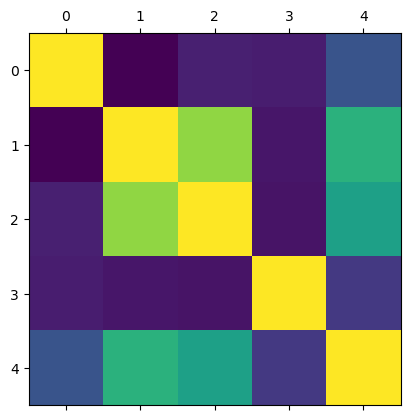

In [9]:
#heat map creation
plt.matshow(subs.corr())
plt.show()

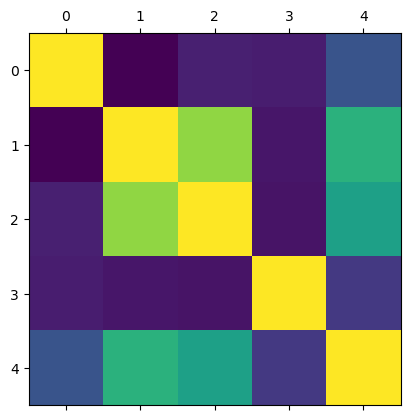

In [10]:
#save figure
plt.matshow(subs.corr())
plt.savefig("out.png") 

In [11]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\galia'

Text(0.5, 1.0, 'Correlation Matrix')

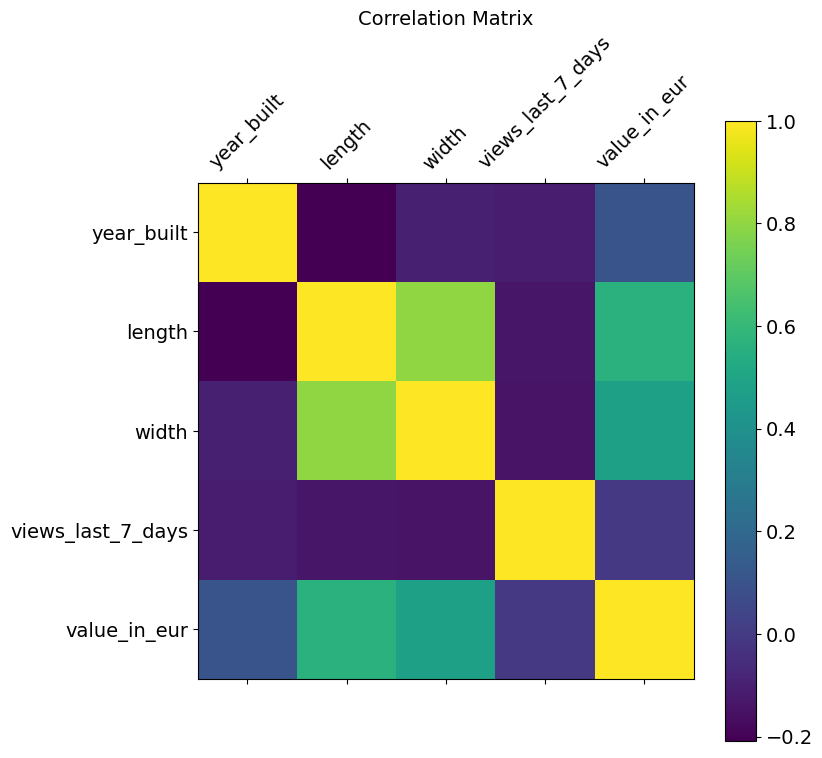

In [12]:
#adding labels
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subs.corr(), fignum=f.number) # type of plot
plt.xticks(range(subs.shape[1]), subs.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(subs.shape[1]), subs.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

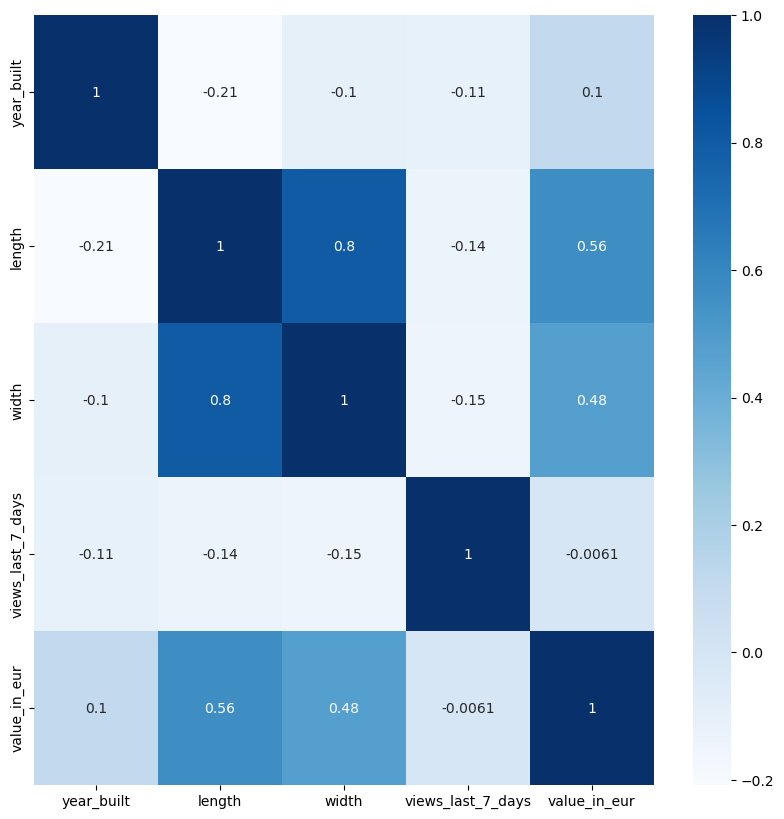

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(subs.corr(), annot = True, ax = ax, cmap='Blues')


#### Correlations
Here the strongest correlation we can observe is about the size of the boat, having length and width the bigges R value
Of course the lenght and width are also correlated because is natural that longer the ship need to be more wide.

### 4 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. 

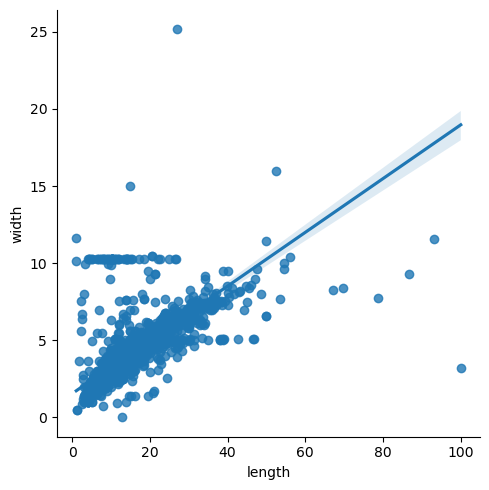

In [14]:
# scatterplots for stronger correlation
sns.lmplot(x = 'length', y = 'width', data = subs)

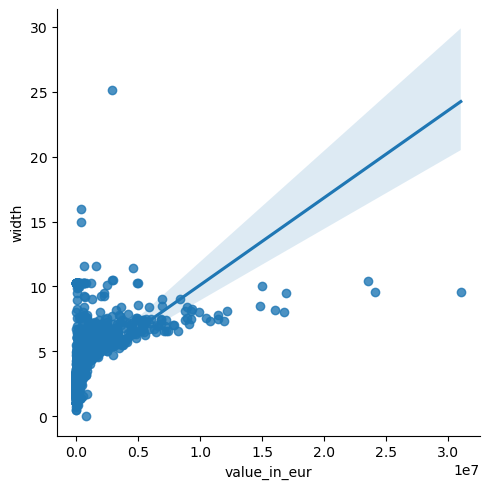

In [15]:
sns.lmplot(x = 'value_in_eur', y = 'width', data = subs)

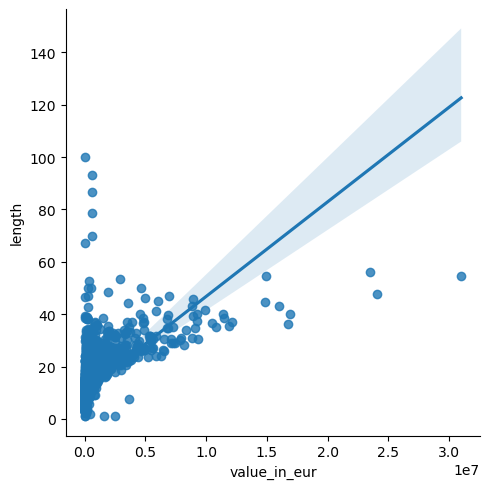

In [16]:
sns.lmplot(x = 'value_in_eur', y = 'length', data = subs)

###  this shows correlation but in purpose of my analysis this respond to a natural behaviour that dont give enough info if we do no cross it with qualitative data

### 5 Create a pair plot of the entire data set.

In [17]:
# creating subset
sub_2=subs[['width', 'length', 'value_in_eur', 'views_last_7_days','year_built']]

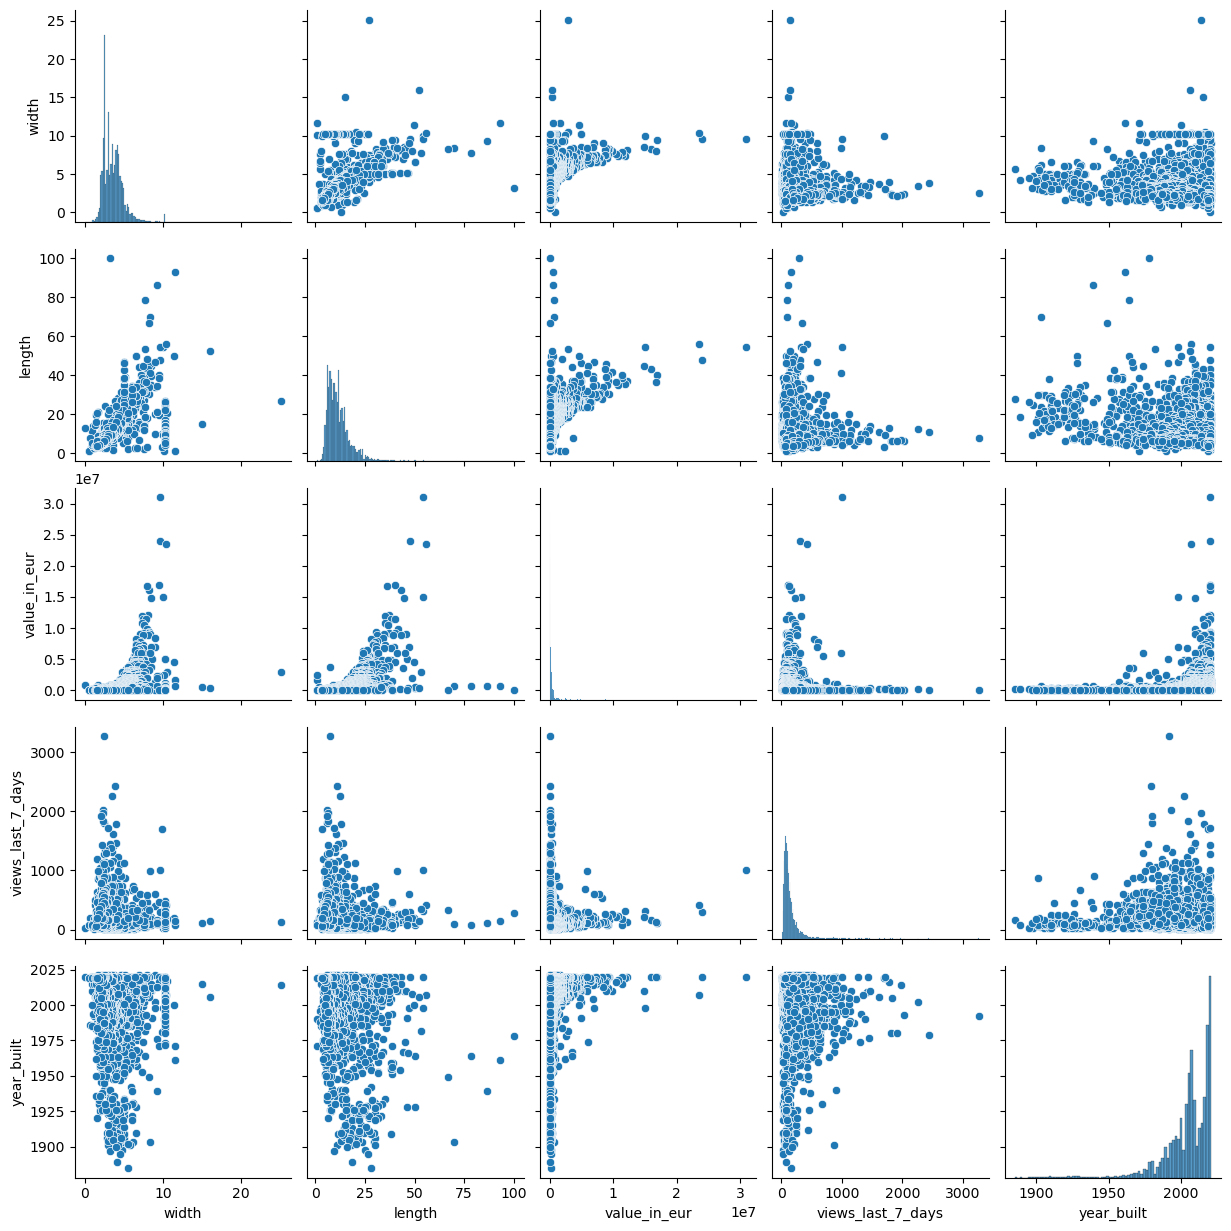

In [18]:
# scatterplots
g = sns.pairplot(sub_2)

### Due the question planted in the previous exercise my analysis will need more quantitative data in order to respond the questions. But for example the question about new boats are more searched, we can observe that there is a lot of data points for newest boats even if the R value is almost neurtral. Also, the data shows that most of recent views are for not expensive units, and also seems to be cheapest units have frequent visits.

### 6 Create a categorical plot and interpret the results.

<Axes: xlabel='value_in_eur', ylabel='Count'>

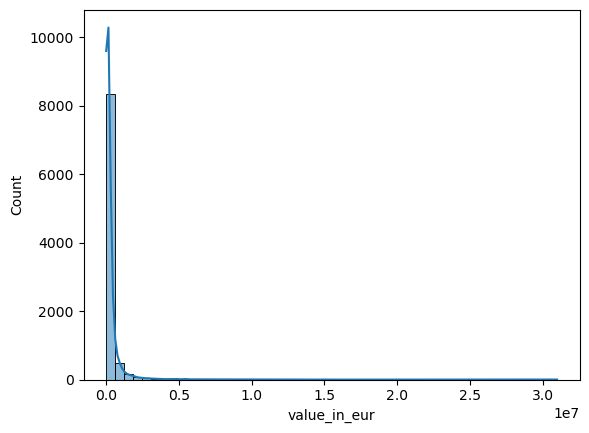

In [19]:
#Create  categorial plot
sns.histplot(sub_2['value_in_eur'], bins = 50, kde = True)

In [20]:
df_boats.describe()

,Unnamed: 0,year_built,length,width,views_last_7_days,value,value_in_eur
count,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9.192000e+03,9.192000e+03
mean,4913.778285,2004.941036,11.738778,3.595622,147.749130,3.206748e+05,3.017992e+05
std,2818.694064,16.400792,6.000763,1.309842,149.196469,9.752226e+05,9.331982e+05
min,0.000000,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,3.300000e+03
25%,2479.750000,1999.000000,7.600000,2.550000,70.000000,4.500000e+04,4.499375e+04
50%,4913.500000,2008.000000,10.500000,3.400000,107.000000,9.895000e+04,9.582950e+04
75%,7328.250000,2018.000000,14.000000,4.270000,170.000000,2.596000e+05,2.495258e+05
max,9887.000000,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


### variable creation for year of built

In [21]:
#creating quartiles
df_boats["value_in_eur"].quantile([0.25,0.5,0.75])

0.25     44993.75
0.50     95829.50
0.75    249525.75
Name: value_in_eur, dtype: float64

#### using the quatiles

In [22]:
df_boats.loc[df_boats['value_in_eur'] < 44993.75, 'Price_range'] = 'low Price'

In [23]:
df_boats.loc[(df_boats['value_in_eur'] >= 95829.50) & (df_boats['value_in_eur'] < 249525.75), 'Price_range'] = 'Middle price'

In [24]:
df_boats.loc[df_boats['value_in_eur'] >= 249525.75, 'Price_range'] = 'High price'

In [25]:
df_boats['Price_range'].value_counts(dropna = False)

low Price       2298
NaN             2298
Middle price    2298
High price      2298
Name: Price_range, dtype: int64

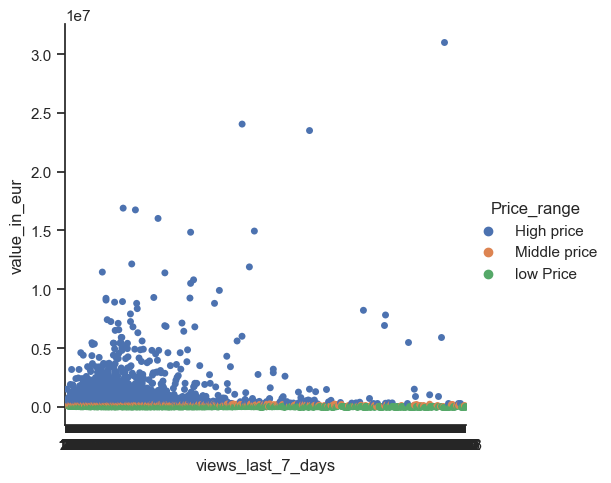

In [26]:
sns.set(style="ticks")
g = sns.catplot(x="views_last_7_days", y="value_in_eur", hue="Price_range", data=df_boats)

#### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### So far the analysis dont give me any certain conclusion, i need to revisit the quantitatives variables in order to find more insight and relationship.

### Define any hypotheses that you can at this point. You’ll be testing these later on.

So far on the analysis we cannot define or find clear correlationships between the variables we analyse on this unit, as mentioned before the qualitatives varialbles seems to be more important thant the quantitatives.